**Computational scaling of SVMs**

Write a python function from which you can generate synthetic datasets of an arbitrary size (e.g. a mixture model of two Gaussians) 

By training SVMs on datasets of different sizes show:

- how the training time scales.

- how the classification time scales (on a sample of 1000 unseen datapoints).

- the accuracy of the classifier (on a sample of 1000 unseen datapoints).

Choose a kernel that you think is appropriate to the task at hand. Come to class with your code and results in a plaintext format suitable for pasting into a poll.



In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
import mlxtend
from mlxtend.plotting import plot_decision_regions

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Generate Data

In [2]:
def gen_data(N, n_components):
    '''
    Generates synthetic data in the form of 'blobs'.
    Input: N (sample size), n_components (the number of blobs)
    Output: X, Y (datapoints and classes)
    
    Source: https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67
    '''
    X, truth = make_blobs(n_samples=N, centers=n_components, 
                          cluster_std = [np.random.choice([2,3,4]) for i in range(n_components)], 
                          random_state=42)
    return X, truth

[]

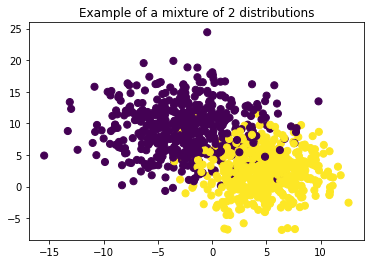

In [3]:
# Example data
n_components = 2
x, y = gen_data(1000, n_components)
plt.scatter(x[:, 0], x[:, 1], s=50, c = y)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.plot()

[]

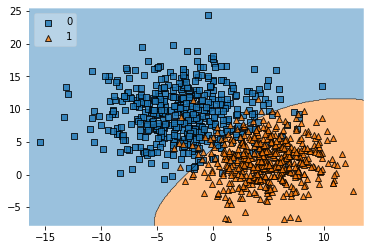

In [4]:
# Example SVM with decision boundary

# Training a classifier
svm_1 = svm.SVC(C=0.5, kernel='rbf')
svm_1.fit(x, y)


# Plotting decision regions
plot_decision_regions(x, y, clf=svm_1, legend=2)
plt.plot()

# Training, timing and scoring the SVM

In [5]:
def get_svm_metrics(x, y):
    '''
    Input: x, y
    Output: training time, prediction time, accuracy
    Splits the data into train and test set,  trains a SVM, predicts accuracy 
    and times training and prediction.
    
    You may choose to split up the following tasks in individual functions. 
    '''
    
    # set up SVM
    clf = svm.SVC(C=0.5, kernel='rbf')
    
    # split into train and test data
    train_start = time.time()
    X_train, X_test, y_train, y_test = \
    train_test_split(x, y, test_size = 0.2, random_state=0)

    # fit SVM model with train data
    clf.fit(X_train, y_train)
    train_end = time.time()
    
    # calculate predictions on test set
    pred_start = time.time()
    y_pred = clf.predict(X_test)
    pred_end = time.time()
    
    # calculate training time
    training_time = train_end - train_start
    
    # calculate prediction time
    prediction_time = pred_end - pred_start

    # calculate accuracy score
    accuracy = np.round(clf.score(X_test,y_test),4)
    
    return training_time, prediction_time, accuracy

# Evaluate Metrics

In [6]:
def multiple_metrics(data_sizes, n_components):
    '''
    Input: array of data sizes
    Output: array of dictionaries with data size, training time, classification time and 
    accuracy for each data size
    
    Runs a for loop on all data sizes and 
    '''
    
    d = []
    
    for N in data_sizes:

        (x, y) = gen_data(N, n_components)
        (training_time,  classification_time, accuracy) = get_svm_metrics(x,y)
        
        d.append({
                '1 data_size': N,
                '2 training_time': training_time, 
                '3 classification_time': classification_time,
                '4 accuracy': accuracy
                 })
        
    return d

In [7]:
# example data sizes and metrics (output not shown)
data_sizes = [10000, 20000, 30000, 40000, 50000]
n_components = 3  # number of classes, blobs
metrics = multiple_metrics(data_sizes, n_components)
pd.DataFrame(metrics)

,1 data_size,2 training_time,3 classification_time,4 accuracy
0,10000,0.037947,0.007508,0.9970
1,20000,0.466114,0.084091,0.9755
2,30000,2.414932,0.455366,0.9295
3,40000,4.904648,0.789422,0.9272
4,50000,3.092128,0.552565,0.9704


# END